# ELE 435-535 Computational Lab 2

### Due Date: 09/30/2019 (Monday) 11:59 PM
### Name: Francisco Carrillo

### Import required Python packages

In [1]:
# Import additional packages if needed
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io

%matplotlib inline

### YALE B Dataset

You will use the YALE B face dataset to explore face recognition by classifying face images. The Yale B dataset contains frontal face images (size 192 x 168) of 38 subjects, with around 64 images per subject (not all subjects have the same number of images). The total number of images is 2,414. The images have been column-wise vectorized into 192 x 168 = 32,256 column vectors and these are stored as the columns of a matrix X. The corresponding 2,414 labels, ranging rom 1 to 39 (no 14), are provided in a row vector Y. For background and additional reading, refer to http://research.microsoft.com/pubs/132810/PAMI-Face.pdf.

### Display Some Images

In [2]:
# This cell is given. You do not need to modify.

# Functions to represent the image in matrix or column vector
def packcw(A):
    return (A.T).reshape(-1,1)

def unpackcw(x,nr):
    return x.reshape(-1,nr).T

1) Load the YALEBXF.mat face data and display the first image of 38 subjects on a 5 x 8 tile. (This part is done as an example) 

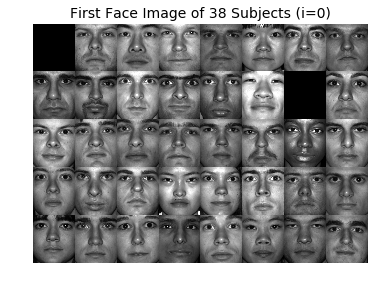

In [3]:
# This cell is given. You do not need to modify.
# You can reference this code for other questions below but just mention where you got it from.

# Load the YALE B database
YALE = io.loadmat('YALEBXF.mat') 
X = YALE['X']
Y = YALE['Y']
nr, nc = 192, 168 # height = 192, width = 168
dim = nr * nc     # dimension = 32256
nex = X.shape[1]  # Total number of examples = 2414

nFc = 40             # Total number of faces
nImg = np.zeros(nFc) # Numper of examples for each person
for i in range(nFc): ##this counts the number of images subject 'i' has
    nImg[i] = (Y==i).sum()
    
# Show the faces
# Make face board of 38 faces
faceIdx = 0 # index of face to display for each subject
Bh, Bw = 5, 8
FB = np.zeros((Bh*nr, Bw*nc))
for i in range(nFc):
    if nImg[i]>0:
        loc = np.where(Y==i)[1]
        x = X[:,loc[faceIdx]]
        A = unpackcw(x,nr)
        row, col = divmod(i,Bw)
        rpt, cpt = row*nr, col*nc
        FB[rpt:rpt+nr, cpt:cpt+nc] = A
plt.figure(figsize = (6,6))
plt.imshow(FB, cmap='gray')
plt.axis('off')
plt.title("First Face Image of 38 Subjects (i=%i)" %faceIdx, fontsize=14)
plt.show()

In [4]:
X.shape 
##the shape is 32256 (rows) by 2414 (images)

(32256, 2414)

2) Before processing the data, split them into training and test sets. Use the first 50 images of each subject as the training data and the rest as the test data. Please note that the total number of images for each subject is different.

In [5]:
#check number of images each subject has:
#print("vector with number of images per subject:", nImg)

#defining training and testing data:
nTrainImages = 50*nFc
trainData = np.zeros((32256,nTrainImages))
YTrain = np.zeros((1,nTrainImages))

nTestImages = 2414-1900#nTrainImages
testData = np.zeros((32256,nTestImages))
YTest = np.zeros((1,nTestImages))

totalSamplesWritten = 0 #indicator for loop
print("shape test data:",testData.shape)

for i in range(nFc): #got the base of this code from previous example        
    if nImg[i]>0:
        loc = np.where(Y==i)[1]
        trainData[:,(i*50):(50*(i+1))] = X[:,loc[:50]]
        YTrain[:,(i*50):(50*(i+1))] = Y[:,loc[:50]]
        
        nTrainSamples = loc.shape[0]-50; #counts number of samples in test set for each subject
        testData[:,(totalSamplesWritten):(totalSamplesWritten+nTrainSamples)] = X[:,loc[50:]]
        YTest[:,(totalSamplesWritten):(totalSamplesWritten+nTrainSamples)] = Y[:,loc[50:]]

        totalSamplesWritten += nTrainSamples

##it seems that the 0th entry and the 14th entry are empty (as shown in the given example in black)
##Removing empty faces (columns with only zeros)
zeroColumns = np.argwhere(np.all(trainData[..., :] == 0, axis=0))
trainData = np.delete(trainData, zeroColumns, axis=1)
YTrain = np.delete(YTrain, zeroColumns, axis=1)
print("shape train data:",trainData.shape)


shape test data: (32256, 514)
shape train data: (32256, 1900)


3) Compute the mean of all the training faces. Then center the entire dataset using this mean. 

In [6]:
# getting the mean
meanTrain = trainData.mean()
print("mean =", meanTrain)

#centering the data sets
cTrainData = trainData - meanTrain
cTestData = testData - meanTrain

mean = 76.84441438883667


### Singular Value Decomposition

4) Compute SVD on the centered training data (You can use the svd function).

Note: Since the data set is large, it might take some time so do it once then save each variable so you can simply load the results again when needed.

In [7]:
#Doing SVD
P, D, Q = np.linalg.svd(cTrainData, full_matrices=False)

#checking matrix decomposition was done correctly
test = P @ np.diag(D) @ Q
print("Data std:",np.std(cTrainData))
print("Reconstructed data std:",np.std(test))
print("Differences in std:",np.std(cTrainData - test))


Data std: 61.51847356974637
Reconstructed data std: 61.51847356974619
Differences in std: 1.4015284871780592e-13


5) Plot the top 200 variances (squares of the singular values) in order from largest to smallest and the cumulative sum of those variances. Use the functions A.sum() and A.cumsum() Where does the difference in variances start to become less significant? Mark the point as a vertical dashed line. At what index do you capture 95% of the total variance? Mark that as a second vertical line.

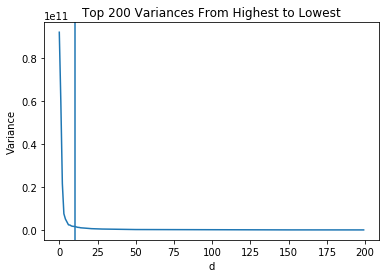

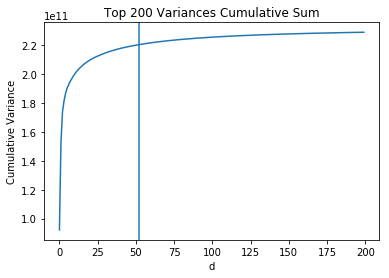

ANSWERS
1) Index where differences in the variance start to be less significant: 10
2) Index where we capture 95% of the total variance: 52


In [8]:
import sys
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold=1000)

#defining vectors
var = D*D
cumSum = var.cumsum()

#plotting
plt.plot(var[:200])
plt.title('Top 200 Variances From Highest to Lowest')
plt.ylabel('Variance')
plt.xlabel('d')
plt.axvline(x=10, ymin=0, ymax=1,dash_capstyle='round')
plt.show()

#finding index where we capture 95% of the variance
index95 = (np.abs(cumSum - 0.95*cumSum[-1])).argmin()

plt.plot(cumSum[:200])
plt.title('Top 200 Variances Cumulative Sum')
plt.ylabel('Cumulative Variance')
plt.xlabel('d')
plt.axvline(x=index95, ymin=0, ymax=1,dash_capstyle='round')
plt.show()

#Printing Answers
print("ANSWERS")
print("1) Index where differences in the variance start to be less significant:",10)
print("2) Index where we capture 95% of the total variance:",index95)

6) Compute the projection of data onto the first $d$ principal components for $d = 8,16,32,64,128,256$.

In [9]:
def projectData(A,d):
    return np.diag(D)[:,:d] @ Q[:d,:]

data8 = projectData(cTrainData,8)
data16 = projectData(cTrainData,16)
data32 = projectData(cTrainData,32)
data64 = projectData(cTrainData,64)
data128 = projectData(cTrainData,128)
data256 = projectData(cTrainData,256)


7) Approximate the original image from the projected data onto first $d$ principal components for $d = 8,16,32,64,128,256$. Then, display the approximate faces for the same images from 1) in a 5 x 8 tile. Remember to add back the mean before displaying the image.

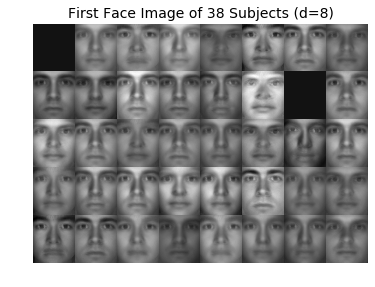

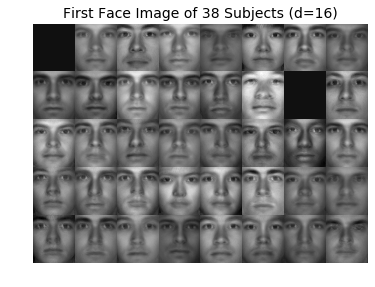

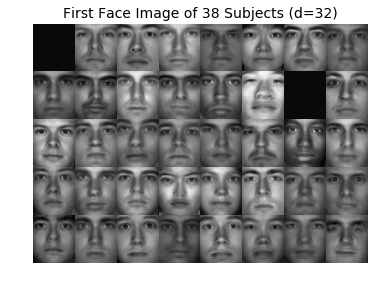

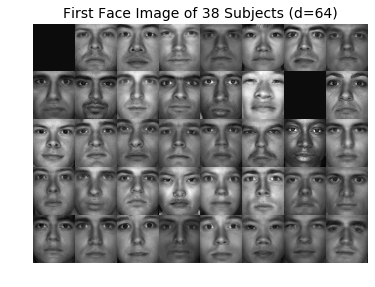

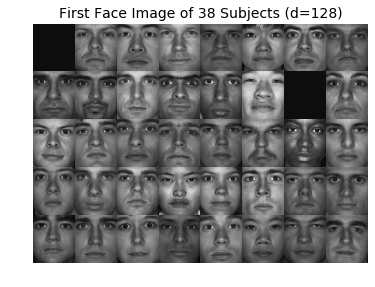

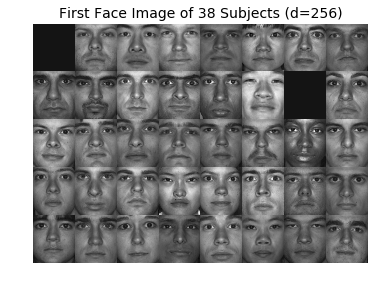

In [10]:
##reconstructing the data from the projections

def reconstructData(projection):
    return P[:,:] @ projection + meanTrain

recon8 = reconstructData(data8)
recon16 = reconstructData(data16)
recon32 = reconstructData(data32)
recon64 = reconstructData(data64)
recon128 = reconstructData(data128)
recon256 = reconstructData(data256)


# Show the faces (this code was addapted from the given example)
def showFaces(data,d): 
    # Make face board of 38 faces
    faceIdx = 0 # index of face to display for each subject
    Bh, Bw = 5, 8
    FB = np.zeros((Bh*nr, Bw*nc))
    for i in range(nFc):
        if nImg[i]>0:
            loc = np.where(YTrain==i)[1]
            x = data[:,loc[faceIdx]]
            A = unpackcw(x,nr)
            row, col = divmod(i,Bw)
            rpt, cpt = row*nr, col*nc
            FB[rpt:rpt+nr, cpt:cpt+nc] = A
    plt.figure(figsize = (6,6))
    plt.imshow(FB, cmap='gray')
    plt.axis('off')
    plt.title("First Face Image of 38 Subjects (d=%d)"%d, fontsize=14)
    plt.show()
    
    
#displaing the faces
showFaces(recon8,8)
showFaces(recon16,16)
showFaces(recon32,32)
showFaces(recon64,64)
showFaces(recon128,128)
showFaces(recon256,256)

### Nearest Neighbor Classifier

Use the first 50 images of each subject as a training data and rest of the images as a test data.

8) Write functions to implement nearest neighbor classifier to classify the faces on the test data and report the accuracy. 

In [11]:
#nearest neighbor classifier is like K-nearest neighbors but with K=1

##identify the label of the nearest neighbor
def getLabel(trainData,testSample): 
    nTrainSamples = trainData.shape[1]
    distanceLabelArray = np.zeros((nTrainSamples,2))
    distanceLabelArray[:,0] = YTrain #adding labels to vector
    for i in range(nTrainSamples):
        distanceLabelArray[i,1] = np.linalg.norm(testSample-trainData[:,i]) #adding distance to vector
        
    #sorting distances and the labels along with it
    distanceLabelArray = distanceLabelArray[distanceLabelArray[:,1].argsort()] 
    bestLabel = distanceLabelArray[0,0]
    return bestLabel
   
##coding the classifier
def NNClassifer(trainData, testData):
    nTestSamples = testData.shape[1]
    resultLabels = np.zeros((1,nTestSamples))
    for j in range(nTestSamples):
        resultLabels[:,j] =  getLabel(trainData,testData[:,j]) #get label of nearest neighbor
        #print("Percent of Data Classifed So Far:",j/nTestSamples)
        
    accuracy = np.sum( YTest == resultLabels) / nTestSamples
    return resultLabels, accuracy
        
labels, accuracy = NNClassifer(trainData, testData)

print("ANSWER: The accuracy is", accuracy)

ANSWER: The accuracy is 0.41245136186770426


In [1]:
print(Ytrain)

NameError: name 'Ytrain' is not defined

9) Apply nearest neighbor classifier for the data projected on $d$ principal components for $d = 8,16,32,64,128,256$. Plot the dimension vs. accuracy graph. How does the dimension affect the accuracy of the classification?

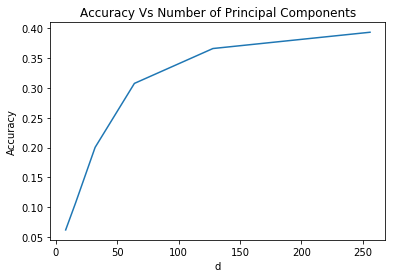

ANSWER: As we increase the dimensions in PCA we get better classification accuracy. However, the increase in accuracy is not monotonic, as we get diminishing returns at around d=128


In [12]:
#acc = [accuracy8, accuracy16, accuracy32, accuracy64, accuracy128, accuracy256, accuracy]
#np.savetxt("accuracyPCA.csv", acc, delimiter=",")

acc = np.loadtxt(open("accuracyPCA.csv", "rb"), delimiter=",", skiprows=0)
accIndex = [8,16,32,64,128,256,1900]

plt.plot(accIndex[:6],acc[:6])
plt.title('Accuracy Vs Number of Principal Components')
plt.ylabel('Accuracy')
plt.xlabel('d')
plt.show()

print("ANSWER: As we increase the dimensions in PCA we get better classification accuracy. However, the increase in accuracy is not monotonic, as we get diminishing returns at around d=128")